In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
books = [
    "The Girl Next Door",
    "Off Season",
    "Offspring",
    "Red",
    "The Lost",
    "Ladies Night",
    "Joyride",
    "Stranglehold"
]

print(books)


['The Girl Next Door', 'Off Season', 'Offspring', 'Red', 'The Lost', 'Ladies Night', 'Joyride', 'Stranglehold']


In [3]:
companies = ["Waterstones", "WHSmith"]

print(companies)


['Waterstones', 'WHSmith']


In [4]:
demographics = [
    "Teen (13-19)",
    "Young Adult (20-35)",
    "Adult (36-55)",
    "Older Adult (56+)"
]

print(demographics)


['Teen (13-19)', 'Young Adult (20-35)', 'Adult (36-55)', 'Older Adult (56+)']


In [5]:
avg_price = 9.50

company_logic = {

    "Waterstones": {
        "foot_traffic": 1.25,
        "conversion_rate": 0.12,
        "profit_margin": 0.42
    },

    "WHSmith": {
        "foot_traffic": 1.10,
        "conversion_rate": 0.09,
        "profit_margin": 0.35
    }

}


In [6]:
data = []


In [7]:
weeks = 52

for company in companies:

    for week in range(1, weeks+1):

        customers = int(100000 * company_logic[company]["foot_traffic"])

        for demo in demographics:

            buyers = int(customers * company_logic[company]["conversion_rate"])

            for book in books:

                units = np.random.randint(20, 200)

                revenue = units * avg_price

                profit = revenue * company_logic[company]["profit_margin"]

                data.append({
                    "Company": company,
                    "Week": week,
                    "Demographic": demo,
                    "Book": book,
                    "Units Sold": units,
                    "Revenue": revenue,
                    "Profit": profit
                })


In [8]:
df = pd.DataFrame(data)

df.head()


,Company,Week,Demographic,Book,Units Sold,Revenue,Profit
0,Waterstones,1,Teen (13-19),The Girl Next Door,130,1235.0,518.70
1,Waterstones,1,Teen (13-19),Off Season,87,826.5,347.13
2,Waterstones,1,Teen (13-19),Offspring,100,950.0,399.00
3,Waterstones,1,Teen (13-19),Red,159,1510.5,634.41
4,Waterstones,1,Teen (13-19),The Lost,68,646.0,271.32


In [9]:
weekly_profit = df.groupby(["Company", "Week"])["Profit"].sum()

weekly_profit.head()


Company  Week
WHSmith  1       12528.600
         2       10683.225
         3       10383.975
         4       11291.700
         5       13014.050
Name: Profit, dtype: float64

In [10]:
yearly_profit = df.groupby("Company")["Profit"].sum()

print(yearly_profit)


Company
WHSmith        602077.70
Waterstones    742343.49
Name: Profit, dtype: float64


In [11]:
demo_profit = df.groupby(["Company", "Demographic"])["Profit"].sum()

print(demo_profit)


Company      Demographic        
WHSmith      Adult (36-55)          149970.800
             Older Adult (56+)      152235.125
             Teen (13-19)           147397.250
             Young Adult (20-35)    152474.525
Waterstones  Adult (36-55)          181975.920
             Older Adult (56+)      192018.750
             Teen (13-19)           184118.550
             Young Adult (20-35)    184230.270
Name: Profit, dtype: float64


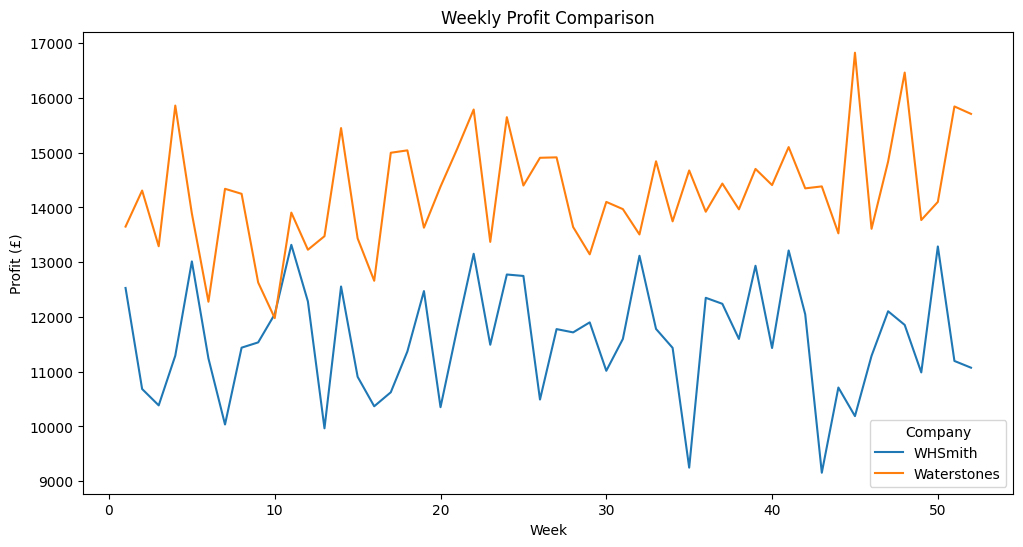

In [12]:
weekly_profit.unstack(0).plot(figsize=(12,6))

plt.title("Weekly Profit Comparison")
plt.xlabel("Week")
plt.ylabel("Profit (£)")
plt.show()


In [13]:
df.to_csv("jack_ketchum_sales_uk.csv", index=False)
